In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib
import statsmodels.api as sm
import quandl
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
path = r'C:/Users/javed/Achievement 6'

In [3]:
quandl.ApiConfig.api_key = 'iqzfar_zCMLXY5otzLs5'

In [22]:
data = quandl.get('FRED/NROU')

In [23]:
data.head()

,Value
Date,
1949-01-01,5.255053
1949-04-01,5.261516
1949-07-01,5.268013
1949-10-01,5.274564
1950-01-01,5.281182


In [24]:
data.shape

(332, 1)

In [25]:
data.columns

Index(['Value'], dtype='object')

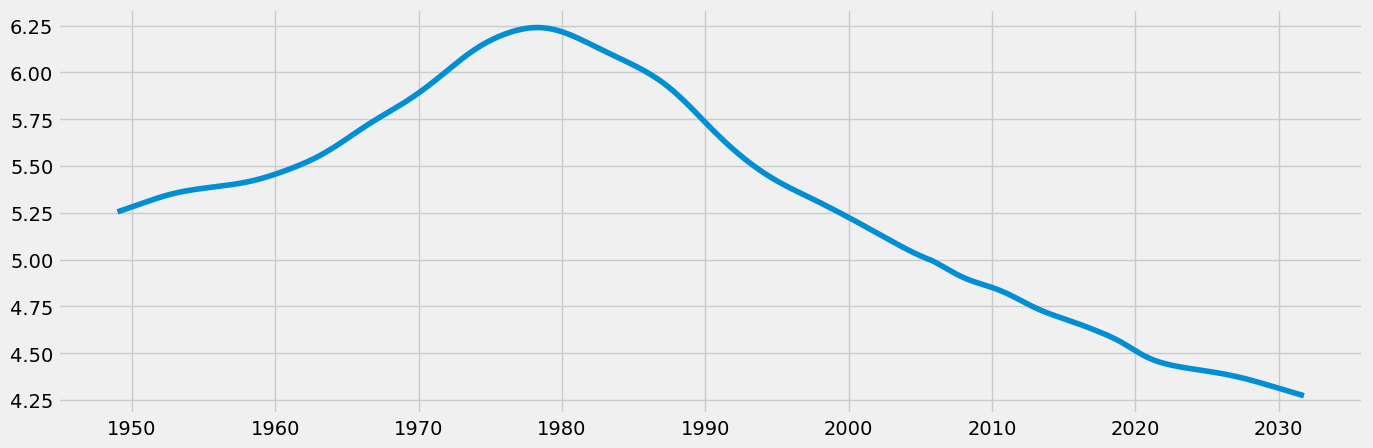

In [26]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

In [27]:
data_2 = data.reset_index()

In [28]:
data_2

,Date,Value
0,1949-01-01,5.255053
1,1949-04-01,5.261516
2,1949-07-01,5.268013
3,1949-10-01,5.274564
4,1950-01-01,5.281182
...,...,...
327,2030-10-01,4.294982
328,2031-01-01,4.289282
329,2031-04-01,4.283630
330,2031-07-01,4.278029


**Subsetting:**

In [29]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2020-06-01')]

In [30]:
data_sub.head()

,Date,Value
124,1980-01-01,6.217371
125,1980-04-01,6.210709
126,1980-07-01,6.203388
127,1980-10-01,6.195496
128,1981-01-01,6.187123


In [31]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1980-01-01,6.217371
1980-04-01,6.210709
1980-07-01,6.203388
1980-10-01,6.195496
1981-01-01,6.187123


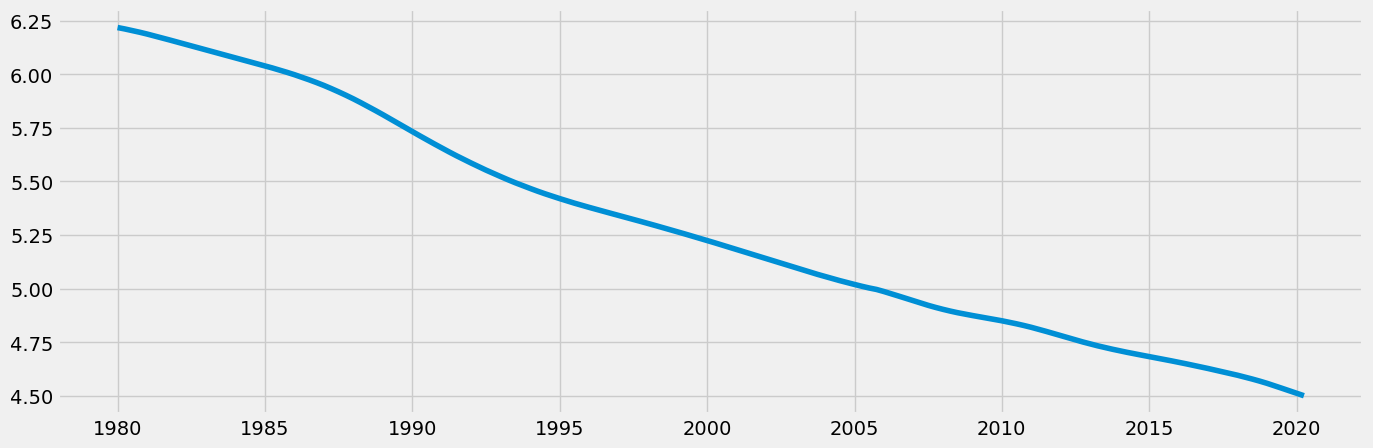

In [32]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [33]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

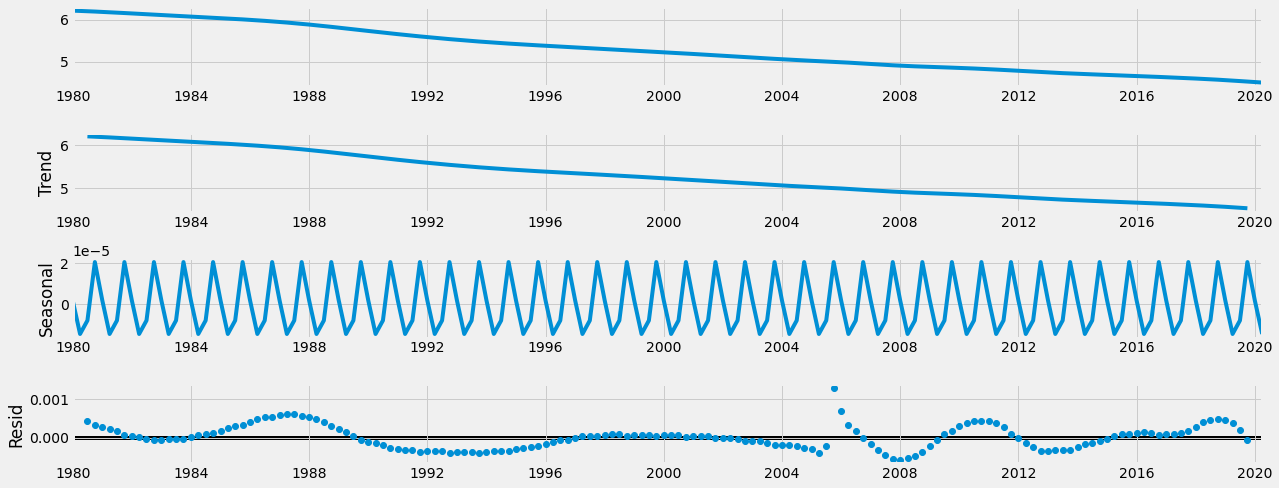

In [35]:
decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)